# Decision Trees (DTs)
DT is an
* hierarchical,
* suprivised, 
* top-down 

algorithm that splits data into clusters to minimize/maximize some clustering metric

In [1]:
from sklearn import tree, preprocessing
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay

* Load dataset
* convert label encoder that converts string labels to IDs and back
* show dataframe with string names, IDs, and data

In [2]:

iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.insert(loc=0, column='IDs', value=iris.target)   # insert IDs

# transform ID list to list of names
le = preprocessing.LabelEncoder()   
le.fit(iris.target_names)   # name1 -> 0, name2 -> 1,...
labels_list = le.inverse_transform(iris.target) # [0,1,0,2,...]-> [name1, name2, name1, name3,...]

df.insert(loc=0, column='Names', value=labels_list) #insert names

np.random.seed(69)
display(df.sample(5))


,Names,IDs,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
4,setosa,0,5.0,3.6,1.4,0.2
58,versicolor,1,6.6,2.9,4.6,1.3
20,setosa,0,5.4,3.4,1.7,0.2
114,virginica,2,5.8,2.8,5.1,2.4
31,setosa,0,5.4,3.4,1.5,0.4


Text(0.5, 1.0, 'Projection on axis 0-2')

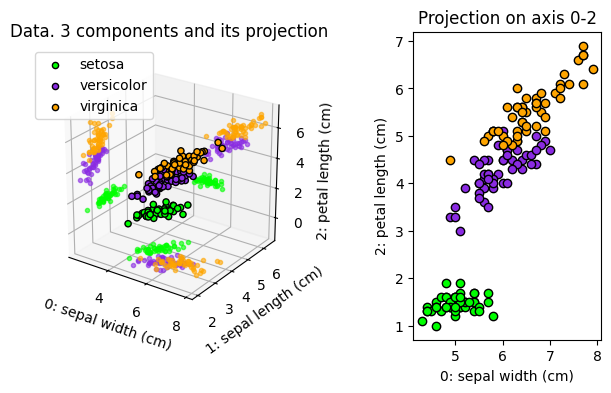

In [3]:
data_all = iris.data[:,:-1] # first 3 entries

min_1,min_2,min_3 = np.min(data_all, axis=0)
max_1,max_2,max_3 = np.max(data_all, axis=0)
data_split = np.array_split(data_all,3)  # split equally
#fig, ax = plt.subplots(1,subplot_kw=dict(projection='3d'),tight_layout=True)
fig = plt.figure(figsize=(8,4))#,tight_layout=True)
fig.subplots_adjust(wspace=0.2)
ax = fig.add_subplot(1, 2, 1, projection='3d')


x,y,z = 0,1,2
a2 = 0.6
offset = 2
for data, name, clr in zip(data_split, iris.target_names, ['lime', 'blueviolet', 'orange']):
    sc = ax.scatter(*data.T, label=name, alpha = 1,edgecolors='black', color= clr)
    ax.plot(*data[:,[x,y]].T, '.', zdir='z', zs=min_3 - offset, alpha = a2, c = clr)
    ax.plot(*data[:,[x,z]].T, '.', zdir='y', zs=max_2 + offset, alpha = a2, c = clr)
    ax.plot(*data[:,[y,z]].T, '.', zdir='x', zs=min_1 - offset, alpha = a2, c = clr)

ax.set_xlabel('0: sepal width (cm)')
ax.set_ylabel('1: sepal length (cm)')
ax.set_zlabel('2: petal length (cm)')
ax.set_title('Data. 3 components and its projection')
ax.view_init(elev=25, azim=-55, roll=0)
ax.set_box_aspect((1, 1, 1), zoom=0.9)
plt.legend();

ax = fig.add_subplot(1, 2, 2)
for data, name, clr in zip(data_split, iris.target_names, ['lime', 'blueviolet', 'orange']):
    ax.scatter(*data[:,[x,z]].T, color = clr, edgecolors='black')

ax.set_xlabel('0: sepal width (cm)')
ax.set_ylabel('2: petal length (cm)')
ax.set_aspect('equal')
ax.set_title('Projection on axis 0-2')

* Split Data into train and test subsets

In [4]:
pair = [0,2]
X_train, X_test, y_train, y_test = train_test_split(iris.data[:,pair], iris.target, random_state=0)
print('train: ',X_train.shape, 'test: ', X_test.shape)

train:  (112, 2) test:  (38, 2)


* Fit model

In [5]:
clf = tree.DecisionTreeClassifier(max_depth=2)
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

* Plot tree diagram and estimator values

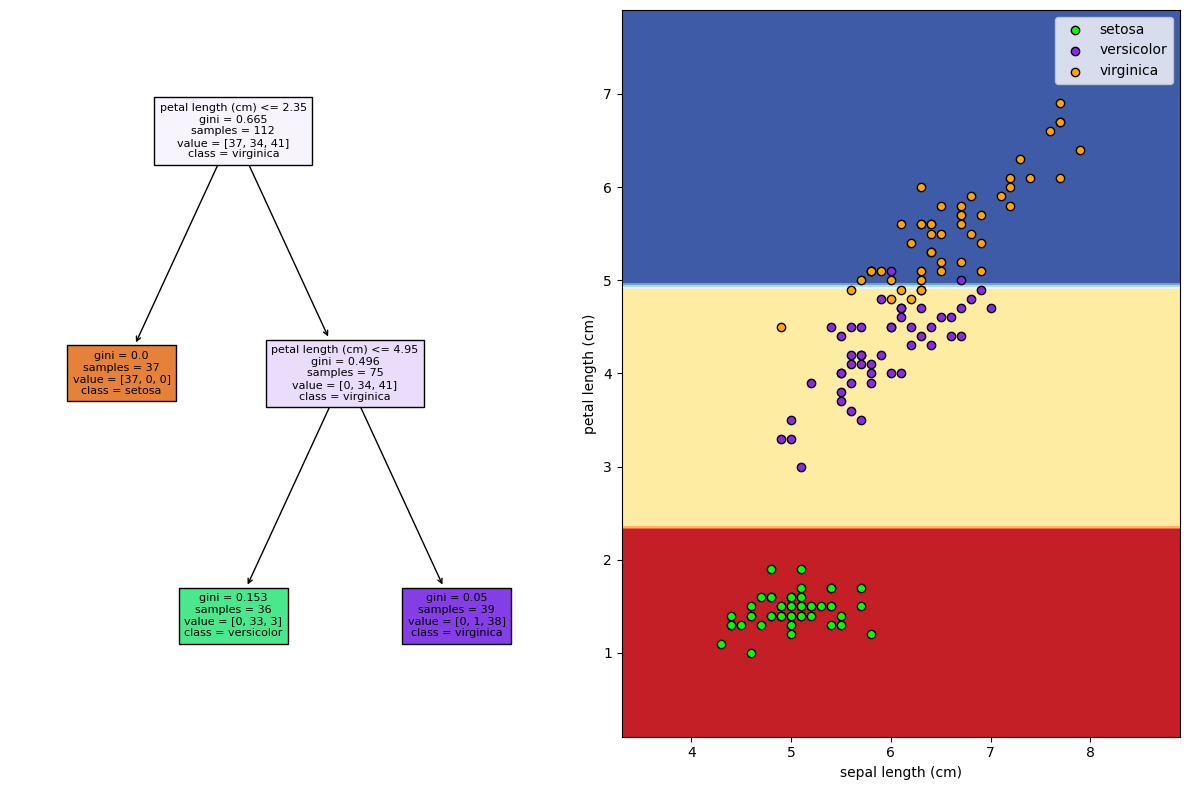

In [14]:
fig, ax = plt.subplots(1,2,tight_layout=True, figsize=(12,8))

tree.plot_tree(clf,
               feature_names = np.array(iris.feature_names)[pair], 
               class_names=iris.target_names,
               filled = True, ax=ax[0],fontsize=8);

DecisionBoundaryDisplay.from_estimator(
        clf,
        X_train,
        cmap=plt.cm.RdYlBu,
        response_method="predict",
        ax=ax[1],
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[2],
    )
for data, name, clr in zip(data_split, iris.target_names, ['lime', 'blueviolet', 'orange']):
    ax[1].scatter(*data[:,[x,z]].T, color = clr, edgecolors='black', label=name)

ax[1].legend()


Text(0.5, 0.98, 'Test data (acc:89.5%)')

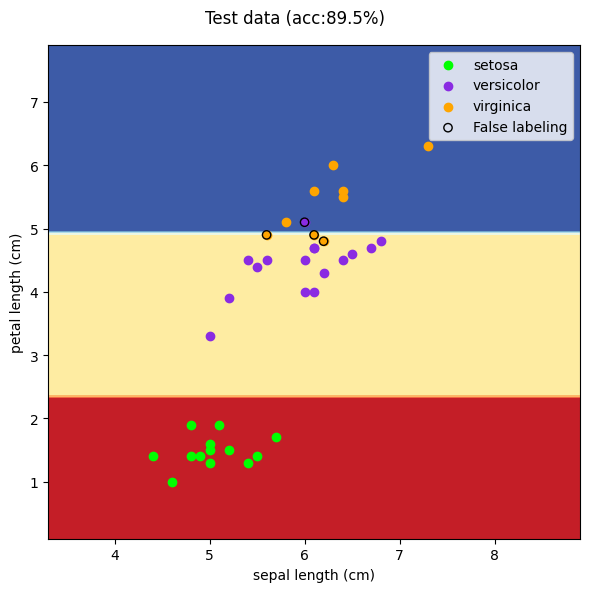

In [26]:
y_predict = clf.predict(X_test)


fig, ax = plt.subplots(1,1,tight_layout=True, figsize=(6,6))
ax = [ax]

DecisionBoundaryDisplay.from_estimator(
        clf,
        X_train,
        cmap=plt.cm.RdYlBu,
        response_method="predict",
        ax=ax[0],
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[2],
    )

masks = [y_test == 0, y_test == 1, y_test == 2]

for mask, name, clr in zip(masks, iris.target_names, ['lime', 'blueviolet', 'orange']):
    data = X_test[mask].T
    ax[0].scatter(*data, color = clr, label=name)
    
mask_false = y_predict != y_test
data = X_test[mask_false].T
ax[0].scatter(*data, label= 'False labeling', edgecolors='black', facecolor='none') 
plt.legend()
plt.suptitle(f'Test data (acc:{np.mean(~mask_false)*100:0.1f}%)')